# Importing packages and data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=44bda5b72292a85140d679693cfbea96af93bba51599a5d0ae701485c4a5fb42
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import string
import re

from wordcloud import WordCloud

from bertopic import BERTopic

from langdetect import detect, DetectorFactory

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
# Define file paths
base_path = '/content/drive/My Drive/CAM_DS/CAM_DS_projects/PureGym_project/'
google_file = base_path + 'Google_12_months.xlsx'
trustpilot_file = base_path + 'Trustpilot_12_months.xlsx'

In [ ]:
# Load Excel files into dataframes
df_google = pd.read_excel(google_file)
df_tp = pd.read_excel(trustpilot_file)

In [ ]:
df_google = df_google.dropna(subset=['Comment'])

In [ ]:
df_google.head()

Customer Name SurveyID for external use (e.g. tech support)  \
1            **                      e9b62vyxtkwrrrfyzc5hz6rk   
2            **                      e2dkxvyxtkwrrrfyzc5hz6rk   
3            **                      e3tfxvyxtkwrrrfyzc5hz6rk   
4            **                      edkrxvyxtkwrrrfyzc5hz6rk   
5            **                      ewbyf88stkwrrrfyzc5hz6rk   

                         Club's Name Social Media Source       Creation Date  \
1             Cambridge Leisure Park      Google Reviews 2024-05-09 22:48:39   
2                     London Holborn      Google Reviews 2024-05-09 22:08:14   
3  Cheshunt Brookfield Shopping Park      Google Reviews 2024-05-09 21:58:07   
4                 Bristol Union Gate      Google Reviews 2024-05-09 21:48:00   
5       209 - Slagelse, Jernbanegade      Google Reviews 2024-05-09 21:36:17   

                                             Comment  Overall Score  
1  Too many students from two local colleges go h...              1  
2  Best range of equipment, cheaper than regular ...              5  
3  Good gym when it’s not busy, tend to get too b...              4  
4  (current member)\n\nGym is quite dirty, more o...              1  
5  Kom og betalte for en prøvetime i centret. Fik...              1

In [ ]:
df_tp.head()

Review ID Review Created (UTC)   Review Consumer User ID  \
0  663d40378de0a14c26c2f63c  2024-05-09 23:29:00  663d4036d5fa24c223106005   
1  663d3c101ccfcc36fb28eb8c  2024-05-09 23:11:00  5f5e3434d53200fa6ac57238   
2  663d375859621080d08e6198  2024-05-09 22:51:00  57171ba90000ff000a18f905   
3  663d4fa1f25670a3339ccf6d  2024-05-09 22:35:00  663d4fa0d5fa24251d1068e7   
4  663d3251d8367b7b3c4ace64  2024-05-09 22:30:00  60c20598384d84001a4250de   

                    Review Title  \
0        A very good environment   
1  I love to be part of this gym   
2                 Extremely busy   
3                    Great vibes   
4      Everything it needs to be   

                                      Review Content  Review Stars  \
0                            A very good environment             5   
1  I love to be part of this gym. Superb value fo...             5   
2                      Extremely busy, no fresh air.             1   
3                         Great vibes, fantastic gym             5   
4             Clean, well managed, classes are good.             5   

  Source Of Review Review Language              Domain URL Webshop Name  \
0            AFSv2              en  http://www.puregym.com   PureGym UK   
1            AFSv2              en  http://www.puregym.com   PureGym UK   
2            AFSv2              en  http://www.puregym.com   PureGym UK   
3            AFSv2              en  http://www.puregym.com   PureGym UK   
4            AFSv2              en  http://www.puregym.com   PureGym UK   

           Business Unit ID  Tags Company Reply Date (UTC)  \
0  508df4ea00006400051dd7b1   NaN      2024-05-10 08:12:00   
1  508df4ea00006400051dd7b1   NaN      2024-05-10 08:13:00   
2  508df4ea00006400051dd7b1   NaN                      NaT   
3  508df4ea00006400051dd7b1   NaN                      NaT   
4  508df4ea00006400051dd7b1   NaN      2024-05-10 08:14:00   

                Location Name                           Location ID  
0  Solihull Sears Retail Park  7b03ccad-4a9d-4a33-9377-ea5bba442dfc  
1                   Aylesbury  612d3f7e-18f9-492b-a36f-4a7b86fa5647  
2         Sutton Times Square  0b78c808-f671-482b-8687-83468b7b5bc1  
3             London Finchley  bc3a9a8c-defe-47b3-8ee6-f73a03b7447e  
4                    Crayford  9ce470b7-57df-4533-af2f-c539422fed14

In [ ]:
df_tp['Review Language'].value_counts()

Review Language
en     16581
da        34
pl         9
pt         9
es         9
it         6
ro         6
fr         4
de         4
bg         1
sco        1
ar         1
sk         1
st         1
et         1
sv         1
lt         1
ru         1
uk         1
tr         1
Name: count, dtype: int64

# Conducting initial data investigation








In [ ]:
# Google dataset
unique_google_locations = df_google['Club\'s Name'].nunique()
print("Unique Google locations:", unique_google_locations)

Unique Google locations: 512


In [ ]:
# Trustpilot dataset
unique_tp_locations = df_tp['Location Name'].nunique()
print("Unique Trustpilot locations:", unique_tp_locations)

Unique Trustpilot locations: 376


In [ ]:
# Get unique locations from both datasets
google_locations = set(df_google["Club's Name"])
tp_locations = set(df_tp["Location Name"])

# Find the intersection
common_locations = google_locations.intersection(tp_locations)

# Number of common locations
num_common_locations = len(common_locations)
print("Number of common locations:", num_common_locations)

Number of common locations: 310


In [ ]:
# Save unprocessed reviews
df_google['Unprocessed Comment'] = df_google['Comment']
df_tp['Unprocessed Review Content'] = df_tp['Review Content']

In [ ]:
# Convert to lowercase
df_google['Comment'] = df_google['Comment'].str.lower()
df_tp['Review Content'] = df_tp['Review Content'].str.lower()

In [ ]:
# Remove punctuation

def clean_text(text):
    # Remove all characters that are not letters, numbers, or spaces
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Replace multiple spaces/newlines with a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing spaces
    return text.strip()

# Apply to both dataframes
df_google['Comment'] = df_google['Comment'].apply(clean_text)
df_tp['Review Content'] = df_tp['Review Content'].apply(clean_text)

In [ ]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

# English stopwords
stop_words_en = set(stopwords.words('english'))
stop_words_de = set(stopwords.words('german'))
stop_words_da = set(stopwords.words('danish'))

# Combine all into a single set
stop_words = stop_words_en.union(stop_words_de).union(stop_words_da)

# Remove stopwords and very short words
def remove_stopwords(text):
    if not isinstance(text, str):  # Skip NaN or non-string values
        return ""
    words = word_tokenize(text)
    # Keep words not in stopwords and longer than 2 characters
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)

# Apply the function to the 'Comment' column
df_google['Comment'] = df_google['Comment'].apply(remove_stopwords)
df_tp['Review Content'] = df_tp['Review Content'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Custom stopwords
custom_stopwords = {"gym", "puregym"}

def remove_custom_words(text):
    if not isinstance(text, str):
        return ""
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(words)

# Apply to your review columns
df_google['Comment'] = df_google['Comment'].apply(remove_custom_words)
df_tp['Review Content'] = df_tp['Review Content'].apply(remove_custom_words)

In [ ]:
# Remove numbers
def remove_numbers(text):
    words = word_tokenize(text)  # Tokenize text into words
    filtered_words = [word for word in words if not word.isnumeric()]  # Keep only words not in stopwords
    return ' '.join(filtered_words)  # Join the filtered words back into a single string

# Apply the function to the 'Comment' column
df_google['Comment'] = df_google['Comment'].apply(remove_numbers)
df_tp['Review Content'] = df_tp['Review Content'].apply(remove_numbers)

In [ ]:
# Tokenize reviews
df_google['Tokens'] = df_google['Comment'].apply(word_tokenize)
df_tp['Tokens'] = df_tp['Review Content'].apply(word_tokenize)

In [ ]:
DetectorFactory.seed = 0  # for reproducibility

# Detect language for each review in Google data
df_google['lang'] = df_google['Comment'].apply(
    lambda x: detect(x) if isinstance(x, str) and x.strip() else 'unknown'
)

df_google['lang'].value_counts()

lang
en         10812
da           512
fr           386
de           325
ca           239
ro           228
af           165
so           149
it           132
nl           118
unknown      112
no           108
es           100
cy            95
pl            92
sl            44
tl            38
sv            37
sw            34
et            34
hr            31
pt            25
hu            18
id            15
fi            11
cs             9
sq             8
lt             7
tr             6
lv             5
sk             3
Name: count, dtype: int64

In [ ]:
# Keep only English reviews (overwrite df_google)
df_google = df_google[df_google['lang'] == 'en']

In [ ]:
df_tp = df_tp[df_tp['Review Language'] == 'en']

In [ ]:
# Flatten all tokens into a single list
all_google_tokens = [word for tokens in df_google['Tokens'] for word in tokens]
all_tp_tokens = [word for tokens in df_tp['Tokens'] for word in tokens]

# Create frequency distribution
fdist_google = FreqDist(all_google_tokens)
fdist_tp = FreqDist(all_tp_tokens)

fdist_google_df = pd.DataFrame(fdist_google.most_common(10), columns=['Word', 'Frequency'])
fdist_tp_df = pd.DataFrame(fdist_tp.most_common(10), columns=['Word', 'Frequency'])

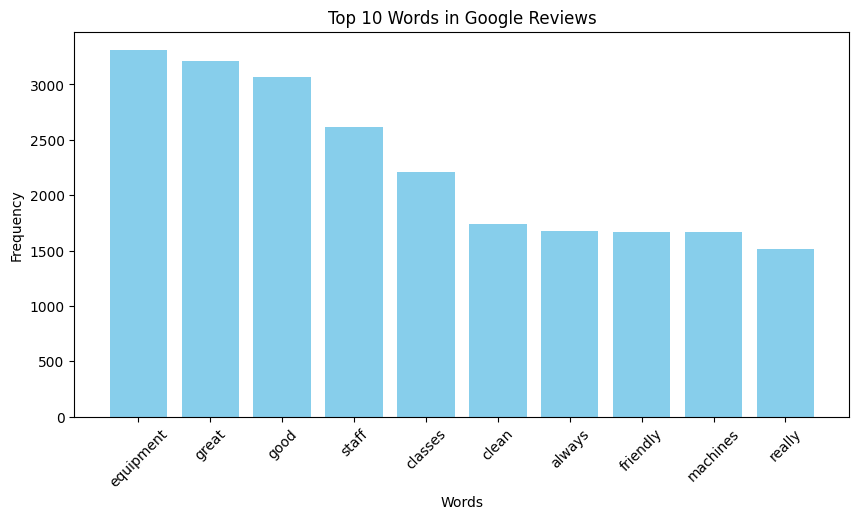

In [ ]:
# Google top 10 words
plt.figure(figsize=(10,5))
plt.bar(fdist_google_df['Word'], fdist_google_df['Frequency'], color='skyblue')
plt.title('Top 10 Words in Google Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

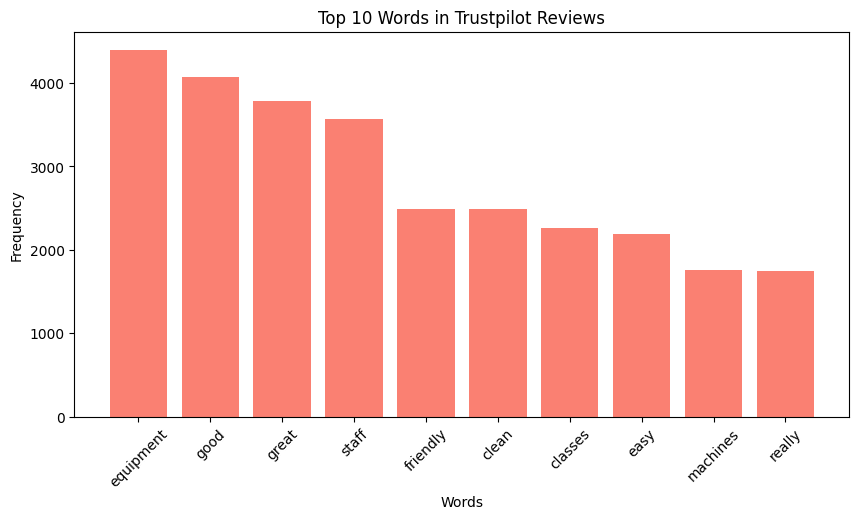

In [ ]:
# Trustpilot top 10 words
plt.figure(figsize=(10,5))
plt.bar(fdist_tp_df['Word'], fdist_tp_df['Frequency'], color='salmon')
plt.title('Top 10 Words in Trustpilot Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Combine all text into one string
text_google = " ".join(df_google['Comment'])
text_tp = " ".join(df_tp['Review Content'])

# Create word cloud
wc_google = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(text_google)
wc_tp = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(text_tp)

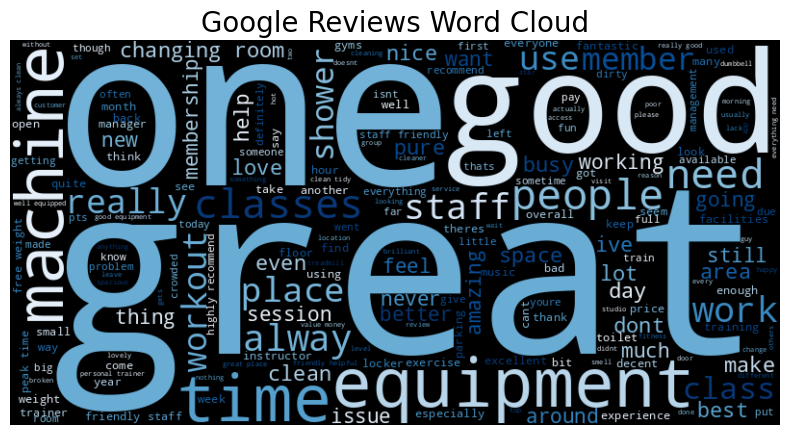

In [ ]:
# Plot google word cloud
plt.figure(figsize=(10,5))
plt.imshow(wc_google, interpolation='bilinear')
plt.axis('off')
plt.title("Google Reviews Word Cloud", fontsize=20)
plt.show()

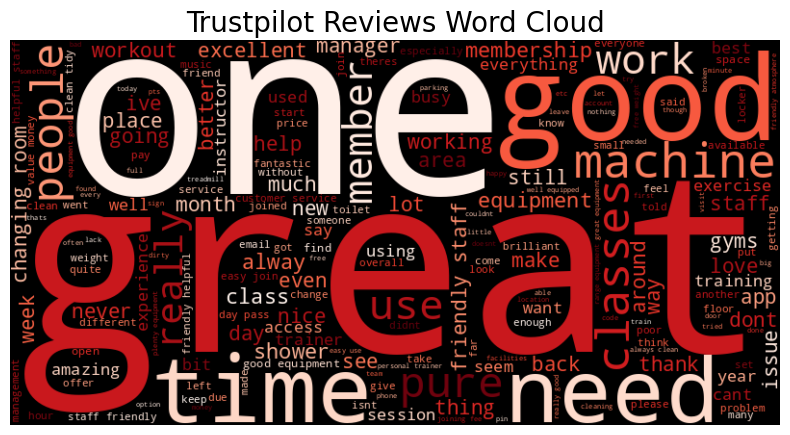

In [ ]:
# Plot trustpilot word cloud
plt.figure(figsize=(10,5))
plt.imshow(wc_tp, interpolation='bilinear')
plt.axis('off')
plt.title("Trustpilot Reviews Word Cloud", fontsize=20)
plt.show()

In [ ]:
# Create dfs for negative reviews
df_google_negative = df_google[df_google['Overall Score'] < 3]
df_tp_negative = df_tp[df_tp['Review Stars'] < 3]

In [ ]:
df_google_negative.head()

Customer Name SurveyID for external use (e.g. tech support)  \
1             **                      e9b62vyxtkwrrrfyzc5hz6rk   
4             **                      edkrxvyxtkwrrrfyzc5hz6rk   
7             **                      erx6f88stkwrrrfyzc5hz6rk   
19            **                      em5fxz3stkwrrrfyzc5hz6rk   
29            **                      etbwctzttkwrrrfyzc5hz6rk   

                 Club's Name Social Media Source       Creation Date  \
1     Cambridge Leisure Park      Google Reviews 2024-05-09 22:48:39   
4         Bristol Union Gate      Google Reviews 2024-05-09 21:48:00   
7                 New Barnet      Google Reviews 2024-05-09 20:16:04   
19  Manchester Cheetham Hill      Google Reviews 2024-05-09 17:03:50   
29    Newcastle Eldon Garden      Google Reviews 2024-05-09 08:38:07   

                                              Comment  Overall Score  \
1   many students two local colleges leave rubbish...              1   
4   current member quite dirty often theres soap b...              1   
7   way hot even workout windows open barely works...              2   
19  access empty assistance gain access fault forg...              2   
29  year finally leaving gutted staff pts lovely c...              2   

                                  Unprocessed Comment  \
1   Too many students from two local colleges go h...   
4   (current member)\n\nGym is quite dirty, more o...   
7   This gym is way too hot to even workout in. Th...   
19  No access for wc 😢.  Empty and no assistance t...   
29  After being at this gym for over a year I'm fi...   

                                               Tokens lang  
1   [many, students, two, local, colleges, leave, ...   en  
4   [current, member, quite, dirty, often, theres,...   en  
7   [way, hot, even, workout, windows, open, barel...   en  
19  [access, empty, assistance, gain, access, faul...   en  
29  [year, finally, leaving, gutted, staff, pts, l...   en

In [ ]:
# Flatten all tokens into a single list
negative_google_tokens = [word for tokens in df_google_negative['Tokens'] for word in tokens]
negative_tp_tokens = [word for tokens in df_tp_negative['Tokens'] for word in tokens]

# Create frequency distribution
fdist_google_negative = FreqDist(negative_google_tokens)
fdist_tp_negative = FreqDist(negative_tp_tokens)

fdist_google_negative_df = pd.DataFrame(fdist_google_negative.most_common(10), columns=['Word', 'Frequency'])
fdist_tp_negative_df = pd.DataFrame(fdist_tp_negative.most_common(10), columns=['Word', 'Frequency'])

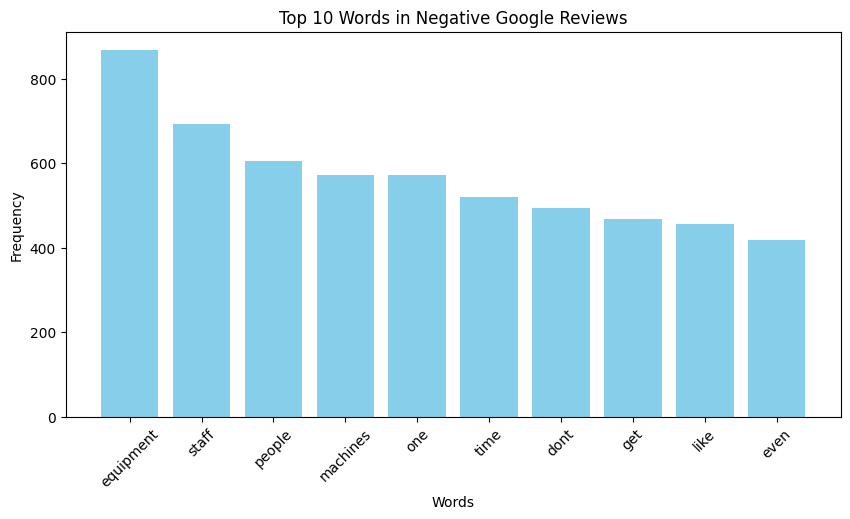

In [ ]:
# Top 10 words - Negative Google Reviews
plt.figure(figsize=(10,5))
plt.bar(fdist_google_negative_df['Word'], fdist_google_negative_df['Frequency'], color='skyblue')
plt.title('Top 10 Words in Negative Google Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

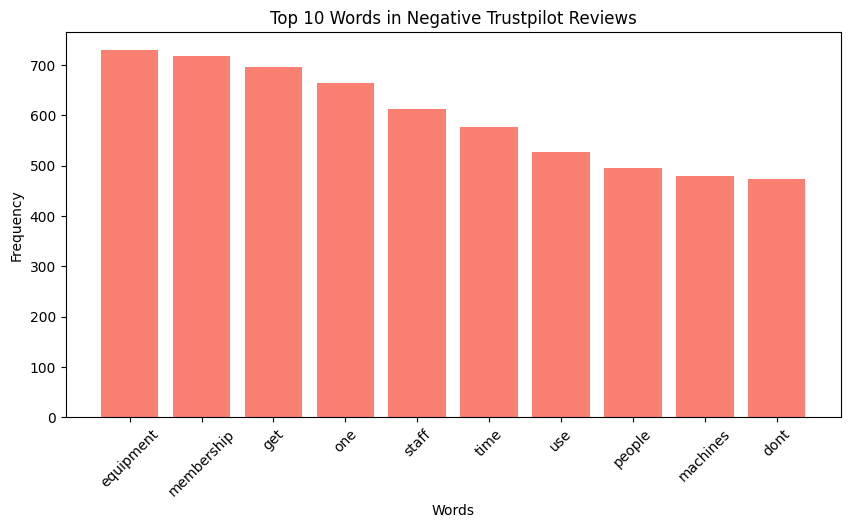

In [ ]:
# Top 10 words - Negative Trustpilot Reviews
plt.figure(figsize=(10,5))
plt.bar(fdist_tp_negative_df['Word'], fdist_tp_negative_df['Frequency'], color='salmon')
plt.title('Top 10 Words in Negative Trustpilot Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Combine all negative text into one string for word cloud
negative_text_google = " ".join(df_google_negative['Comment'])
negative_text_tp = " ".join(df_tp_negative['Review Content'])

# Create word clouds
wc_google_negative = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(negative_text_google)
wc_tp_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text_tp)


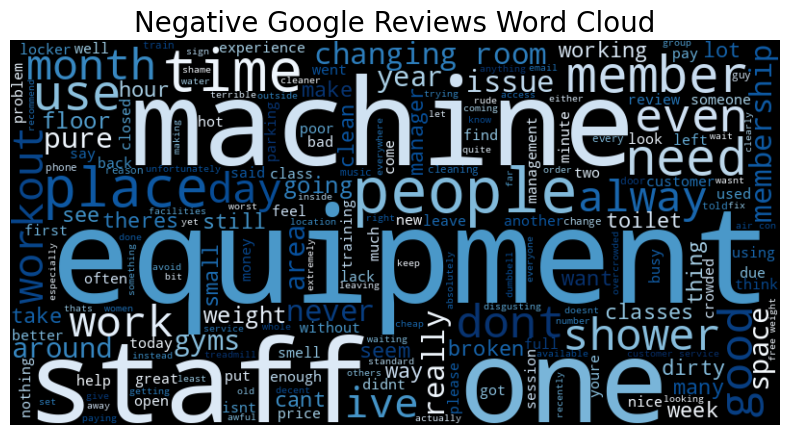

In [ ]:
# Plot Google negative reviews word cloud
plt.figure(figsize=(10,5))
plt.imshow(wc_google_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Google Reviews Word Cloud", fontsize=20)
plt.show()

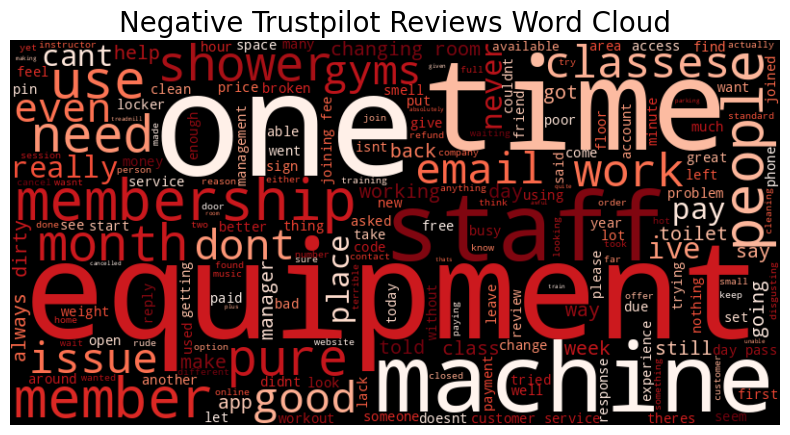

In [ ]:
# Plot Trustpilot negative reviews word cloud
plt.figure(figsize=(10,5))
plt.imshow(wc_tp_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Trustpilot Reviews Word Cloud", fontsize=20)
plt.show()

# Conducting initial topic modelling








In [ ]:
# Google negatives but not in Trustpilot negatives
google_only_negative_locations = set(df_google_negative["Club's Name"]) - set(df_tp_negative["Location Name"])

# Trustpilot negatives but not in Google negatives
tp_only_negative_locations = set(df_tp_negative["Location Name"]) - set(df_google_negative["Club's Name"])

print("Google-only negative locations:", google_only_negative_locations)
print("Trustpilot-only negative locations:", tp_only_negative_locations)

Google-only negative locations: {'Canterbury Wincheap', 'Maldon', 'Peterborough Serpentine', 'Tonbridge', 'London Camden', 'Edinburgh Waterfront', 'Macclesfield', 'St Ives Cambridgeshire', 'london Croydon', 'Stratford-Upon-Avon', 'Ashton Under Lyne', '604 - Kbh. V., Vesterbrogade', 'Lausanne Prilly', 'Motherwell', 'Banbury Cross', 'Horgen', 'Galashiels', 'London Tower Hill', '603 - Hvidovre, Biblioteksvej', 'Pfäffikon SZ', '223 - Kbh. NV., Tomsgårdsvej', 'London Catford', 'Zürich West', 'London Shoreditch High Street', '190 - Horsens, Ove Jensens Allé', 'Tysons Corner', 'Inverness Inshes', '248 - Vanløse, Vanløse Torv', 'Cirencester', '244 - Vallensbæk, Stationstorv', 'London Palmers Green', 'Oftringen', 'Weston Super Mare', 'Haverhill Retail Park', 'Northallerton', 'Bournemouth the triangle', 'Mansfield', 'Stoke on Trent East', '101 - Kbh. V., Gasværksvej', 'Evesham', 'Bachenbülach', 'Dagenham', '113 - Århus N., JBV', '261 - Kbh. Ø., Oslo Plads', 'Springfield', '191 - Kbh. S., England

In [ ]:
# Google reviews at common negative locations
df_only_google_negative = df_google_negative[df_google_negative["Club's Name"].isin(google_only_negative_locations)]

# Trustpilot reviews at common negative locations
df_only_tp_negative = df_tp_negative[df_tp_negative["Location Name"].isin(tp_only_negative_locations)]

In [ ]:
# Convert columns to lists
google_reviews = df_only_google_negative['Comment'].tolist()
tp_reviews = df_only_tp_negative['Review Content'].tolist()

# Merge into a single list
merged_reviews = google_reviews + tp_reviews

In [ ]:
# Fit the model
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(merged_reviews)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Get top topics and their frequencies
topic_info = topic_model.get_topic_info()

In [ ]:
topic_model.get_topic_freq().head(10)

Topic  Count
1      -1    802
14      0    162
2       1    127
15      2     98
0       3     64
12      4     61
17      5     53
28      6     45
21      7     39
10      8     38

In [ ]:
topic_info.head()

Topic  Count                                Name  \
0     -1    802  -1_equipment_get_membership_people   
1      0    162         0_fee_joining_code_discount   
2      1    127   1_toilets_dirty_cleaning_changing   
3      2     98              2_pass_day_code_bought   
4      3     64           3_staff_rude_trainer_like   

                                      Representation  \
0  [equipment, get, membership, people, one, staf...   
1  [fee, joining, code, discount, charged, month,...   
2  [toilets, dirty, cleaning, changing, clean, to...   
3  [pass, day, code, bought, pin, received, paid,...   
4  [staff, rude, trainer, like, manager, experien...   

                                 Representative_Docs  
0  [email sent twice customer services still wait...  
1  [given offer joining fee charged joining, join...  
2  [changing rooms dirty soap ladies changing roo...  
3  [paid day pass couldnt use never got code time...  
4  [unfortunate experience member pure must say s...

In [ ]:
# Top 2 topics
top_topics = topic_info[topic_info['Topic'] != -1].head(2)
top_topics

Topic  Count                               Name  \
1      0    162        0_fee_joining_code_discount   
2      1    127  1_toilets_dirty_cleaning_changing   

                                      Representation  \
1  [fee, joining, code, discount, charged, month,...   
2  [toilets, dirty, cleaning, changing, clean, to...   

                                 Representative_Docs  
1  [given offer joining fee charged joining, join...  
2  [changing rooms dirty soap ladies changing roo...

In [ ]:
for topic_id in top_topics['Topic']:
    words = topic_model.get_topic(topic_id)  # returns list of (word, score) tuples
    print(f"Topic {topic_id}:")
    for word, score in words:
        print(f"  {word} ({score:.3f})")
    print()

Topic 0:
  fee (0.090)
  joining (0.088)
  code (0.049)
  discount (0.046)
  charged (0.032)
  month (0.028)
  promo (0.025)
  months (0.022)
  price (0.022)
  payment (0.021)

Topic 1:
  toilets (0.043)
  dirty (0.041)
  cleaning (0.039)
  changing (0.031)
  clean (0.030)
  toilet (0.026)
  equipment (0.024)
  room (0.023)
  soap (0.022)
  filthy (0.019)



In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_info.head(11)

Topic  Count                                     Name  \
0      -1    802       -1_equipment_get_membership_people   
1       0    162              0_fee_joining_code_discount   
2       1    127        1_toilets_dirty_cleaning_changing   
3       2     98                   2_pass_day_code_bought   
4       3     64                3_staff_rude_trainer_like   
5       4     61              4_classes_class_book_booked   
6       5     53            5_gyms_plus_membership_access   
7       6     45  6_cancel_cancellation_membership_button   
8       7     39       7_air_hot_conditioning_temperature   
9       8     38         8_machines_broken_enough_machine   
10      9     35           9_customer_service_email_tried   

                                       Representation  \
0   [equipment, get, membership, people, one, staf...   
1   [fee, joining, code, discount, charged, month,...   
2   [toilets, dirty, cleaning, changing, clean, to...   
3   [pass, day, code, bought, pin, received, paid,...   
4   [staff, rude, trainer, like, manager, experien...   
5   [classes, class, book, booked, instructor, pil...   
6   [gyms, plus, membership, access, use, paid, ca...   
7   [cancel, cancellation, membership, button, pag...   
8   [air, hot, conditioning, temperature, con, swe...   
9   [machines, broken, enough, machine, many, miss...   
10  [customer, service, email, tried, emails, get,...   

                                  Representative_Docs  
0   [email sent twice customer services still wait...  
1   [given offer joining fee charged joining, join...  
2   [changing rooms dirty soap ladies changing roo...  
3   [paid day pass couldnt use never got code time...  
4   [unfortunate experience member pure must say s...  
5   [couldnt book one class couldnt see busy class...  
6   [membership prices ridiculous pay month able a...  
7   [impossible cancel service, want cancel member...  
8   [air flow temperature set 21c first day asked ...  
9   [machines broken much variety machines number ...  
10  [seriously guys need get active professional c...

# Gym Review Topics – Cluster Descriptions

### Topic 0 – **Cleanliness & Facilities**
- **Top words:** showers, dirty, toilets, shower, changing  
- **Theme:** Complaints or feedback about hygiene and cleanliness in shared facilities such as showers, toilets, and changing rooms.

---

### Topic 1 – **Buddy/Referral System**
- **Top words:** buddy, join, friend, email, account  
- **Theme:** Discussions around referral programs, buddy passes, and account setup when joining with friends.

---

### Topic 2 – **Day Pass & Access**
- **Top words:** pass, day, code, bought, pin  
- **Theme:** Feedback about short-term passes, day access, or entry codes for non-members or visitors.

---

### Topic 3 – **Staff & Trainers**
- **Top words:** staff, rude, manager, trainer, like  
- **Theme:** Customer experiences with gym staff, trainers, and management—often highlighting negative interactions or rudeness.

---

### Topic 4 – **Classes & Scheduling**
- **Top words:** classes, class, book, booked, instructor  
- **Theme:** Booking group fitness classes, availability, and instructor quality.

---

### Topic 5 – **Membership Plans**
- **Top words:** gyms, plus, access, membership, use  
- **Theme:** Membership levels, multi-gym access, and usage rights under different plans.

---

### Topic 6 – **Cancellations**
- **Top words:** cancel, cancellation, membership, button, page  
- **Theme:** Issues around canceling memberships—process difficulty, unclear options, or poor online cancellation systems.

---

### Topic 7 – **Equipment & Crowding**
- **Top words:** equipment, crowded, enough, people, equipments  
- **Theme:** Availability of machines and equipment, with common complaints about crowding and lack of sufficient resources.

---

### Topic 8 – **Broken Machines**
- **Top words:** machines, enough, broken, machine, many  
- **Theme:** Problems with gym machines being out of order, insufficient functioning equipment.

---

### Topic 9 – **Air Conditioning & Temperature**
- **Top words:** air, hot, conditioning, temperature, sweat  
- **Theme:** Complaints about poor air conditioning, hot environments, and uncomfortable workout conditions.

---

# Summary
The topics can be grouped into broader **themes**:  
- **Facilities & Environment**: (Topic 0, 9)  
- **Membership & Access**: (Topic 1, 2, 5, 6)  
- **Staff & Services**: (Topic 3, 4)  
- **Equipment & Availability**: (Topic 7, 8)  

This breakdown helps identify major areas of customer concern across different gym locations.

# Performing further data investigation




In [ ]:
# Top 20 Google negative locations
df_google_negative["Club's Name"].value_counts().head(20)

Club's Name
London Stratford            57
London Woolwich             26
London Canary Wharf         24
London Enfield              23
London Swiss Cottage        21
London Leytonstone          21
London Palmers Green        20
Birmingham City Centre      19
Wakefield                   18
London Hayes                17
Bradford Thornbury          17
London Seven Sisters        17
New Barnet                  17
Peterborough Serpentine     17
Manchester Exchange Quay    17
London Hoxton               16
London Bermondsey           15
Sutton Times Square         15
Walsall Crown Wharf         15
Nottingham Colwick          15
Name: count, dtype: int64

In [ ]:
# Top 20 trustpilot negative locations
df_tp_negative["Location Name"].value_counts().head(20)

Location Name
Leicester Walnut Street      50
345                          45
London Enfield               23
London Stratford             22
Burnham                      20
London Bermondsey            18
London Ilford                18
York                         16
London Hayes                 16
London Seven Sisters         16
London Finchley              16
Maidenhead                   16
Northwich                    15
London Swiss Cottage         15
London Hammersmith Palais    15
Basildon                     14
Telford                      14
Birmingham Beaufort Park     14
London Bromley               14
Watford Waterfields          14
Name: count, dtype: int64

## 📝 Commentary on Negative Reviews Across Locations

When comparing the **top 20 negative locations** from Google Reviews and Trustpilot:

- **Overlap exists**: Several locations appear in *both* datasets, including  
  - London Stratford  
  - London Enfield  
  - London Swiss Cottage  
  - London Hayes  
  - London Seven Sisters  
  - London Bermondsey  

- **Differences**:  
  - Google shows a heavier concentration in **London** (Stratford, Canary Wharf, Swiss Cottage, etc.), with a few outside London such as Birmingham, Manchester, Nottingham, and Wakefield.  
  - Trustpilot highlights additional sites such as **Leicester Walnut Street, Burnham, York, Maidenhead, Basildon, Telford**, etc., that don’t appear prominently in Google.  
  - There’s also an odd entry in Trustpilot (`345`) — possibly a data quality issue (location incorrectly parsed or stored).

- **Conclusion**:  
  The results show that **both platforms capture some of the same problem locations** (suggesting consistent customer dissatisfaction), but also **each platform highlights different sites**.  
  This may reflect differences in **reviewer demographics** (Google vs. Trustpilot users), **sample sizes**, or **data quality** (e.g., Trustpilot’s “345”).  

In [ ]:
# Count negative reviews by location for each dataset
google_counts = df_google_negative.groupby("Club's Name").size().reset_index(name='total_count_g')
tp_counts = df_tp_negative.groupby("Location Name").size().reset_index(name='total_count_tp')

# Merge on location (inner join to keep only locations present in both)
merged_counts = pd.merge(tp_counts, google_counts, how='inner',
                         left_on='Location Name', right_on="Club's Name")

# Clean up the dataframe
merged_counts = merged_counts.drop("Club's Name", axis=1)
merged_counts['total_count'] = merged_counts['total_count_tp'] + merged_counts['total_count_g']

# Sort by total_count descending
merged_counts_sorted = merged_counts.sort_values(by='total_count', ascending=False)

In [ ]:
# View top 30
print(len(merged_counts_sorted))
merged_counts_sorted.head(30)

287


Location Name  total_count_tp  total_count_g  total_count
174           London Stratford              22             57           79
116    Leicester Walnut Street              50              9           59
144             London Enfield              23             23           46
176       London Swiss Cottage              15             21           36
171       London Seven Sisters              16             17           33
152               London Hayes              16             17           33
21      Birmingham City Centre              14             19           33
131          London Bermondsey              18             15           33
31          Bradford Thornbury              14             17           31
200                 New Barnet              14             17           31
136        London Canary Wharf               6             24           30
44                     Burnham              20              9           29
151  London Hammersmith Palais              15             14           29
146            London Finchley              16             12           28
271        Walsall Crown Wharf              13             15           28
10                    Basildon              14             12           26
185                 Maidenhead              16             10           26
164        London Muswell Hill              13             13           26
20    Birmingham Beaufort Park              14             11           25
216         Nottingham Colwick              10             15           25
270                  Wakefield               7             18           25
161         London Leytonstone               3             21           24
155              London Hoxton               8             16           24
190   Manchester Exchange Quay               6             17           23
54                     Chatham               9             14           23
115   Leicester St Georges Way              13             10           23
168          London Park Royal               9             14           23
153             London Holborn               9             14           23
262        Sutton Times Square               7             15           22
130             London Beckton               9             13           22

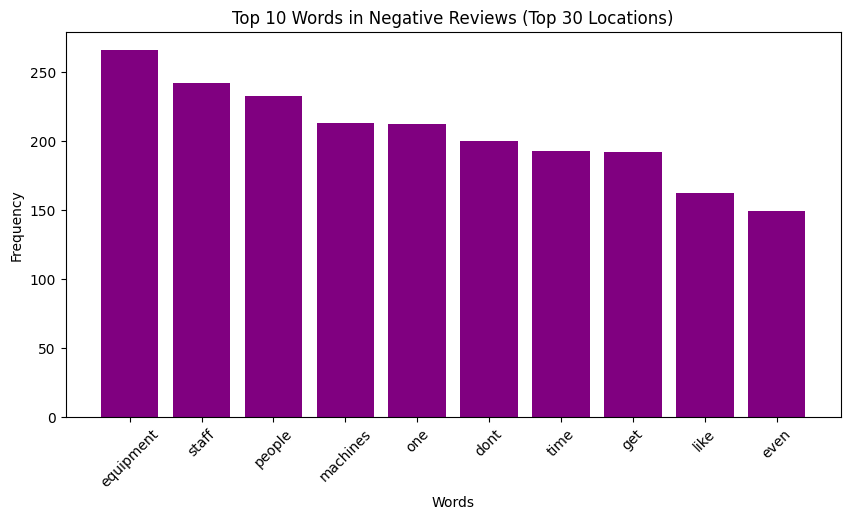

In [ ]:
# Merged Negative Reviews - Top 30 Locations

# Get top 30 locations by total negative reviews
top30_locations = merged_counts_sorted.head(30)['Location Name'].tolist()

# Filter Google and Trustpilot negative reviews for these locations
df_google_top30 = df_google_negative[df_google_negative["Club's Name"].isin(top30_locations)]
df_tp_top30 = df_tp_negative[df_tp_negative["Location Name"].isin(top30_locations)]

# Combine all reviews into one merged string
merged_text = " ".join(df_google_top30['Comment'].dropna()) + " " + \
              " ".join(df_tp_top30['Review Content'].dropna())

# Tokenize and create frequency distribution
merged_tokens = [word for word in word_tokenize(merged_text)]
fdist_merged = FreqDist(merged_tokens)

# Convert top 10 words to DataFrame for plotting
fdist_merged_df = pd.DataFrame(fdist_merged.most_common(10), columns=['Word', 'Frequency'])


plt.figure(figsize=(10,5))
plt.bar(fdist_merged_df['Word'], fdist_merged_df['Frequency'], color='purple')
plt.title('Top 10 Words in Negative Reviews (Top 30 Locations)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

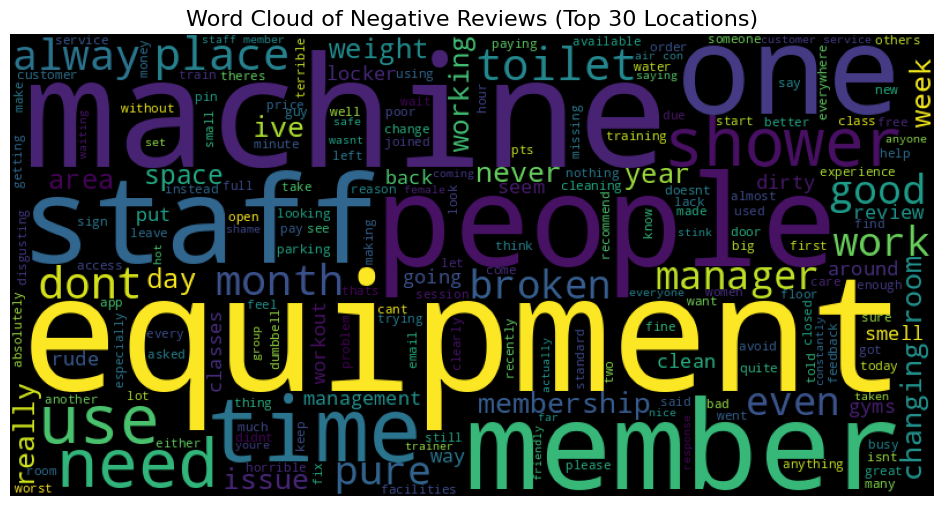

In [ ]:
wc_merged = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(merged_text)

plt.figure(figsize=(12,6))
plt.imshow(wc_merged)
plt.axis('off')
plt.title('Word Cloud of Negative Reviews (Top 30 Locations)', fontsize=16)
plt.show()

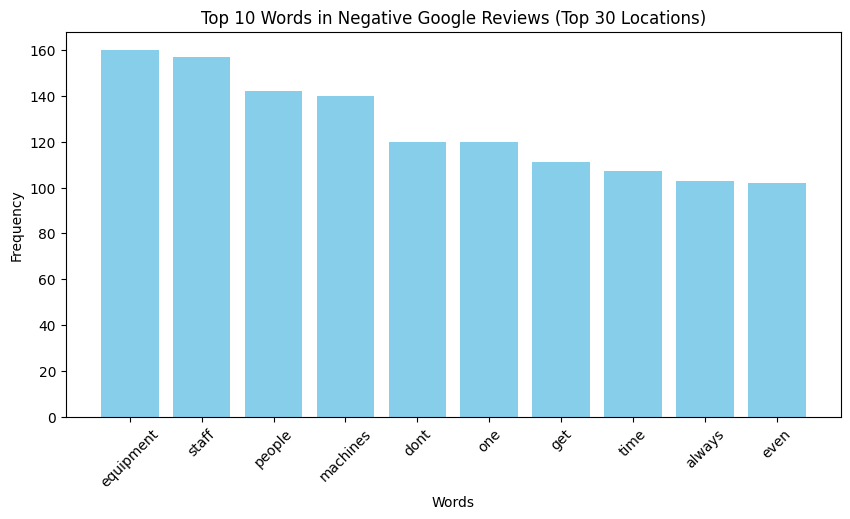

In [ ]:
# Google Negative Reviews - Top 30 Locations

# Flatten all tokens into a single list
google_top30_tokens = [word for tokens in df_google_top30['Tokens'] for word in tokens]

# Create frequency distribution
fdist_google_top30 = FreqDist(google_top30_tokens)

# Top 10 words DataFrame
fdist_google_top30_df = pd.DataFrame(fdist_google_top30.most_common(10), columns=['Word', 'Frequency'])

# Plot Google top 10 words
plt.figure(figsize=(10,5))
plt.bar(fdist_google_top30_df['Word'], fdist_google_top30_df['Frequency'], color='skyblue')
plt.title('Top 10 Words in Negative Google Reviews (Top 30 Locations)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

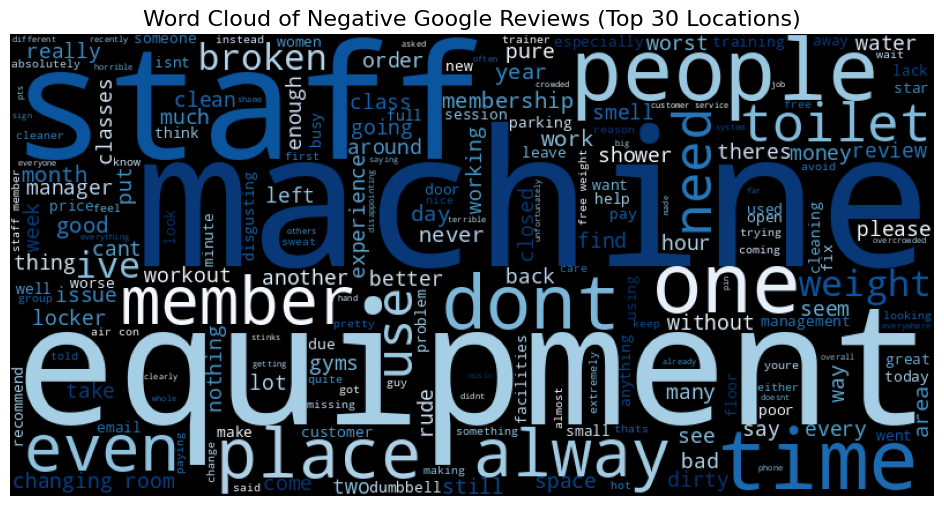

In [ ]:
# Word cloud for Google
wc_google_top30 = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(" ".join(df_google_top30['Comment'].dropna()))

plt.figure(figsize=(12,6))
plt.imshow(wc_google_top30)
plt.axis('off')
plt.title('Word Cloud of Negative Google Reviews (Top 30 Locations)', fontsize=16)
plt.show()

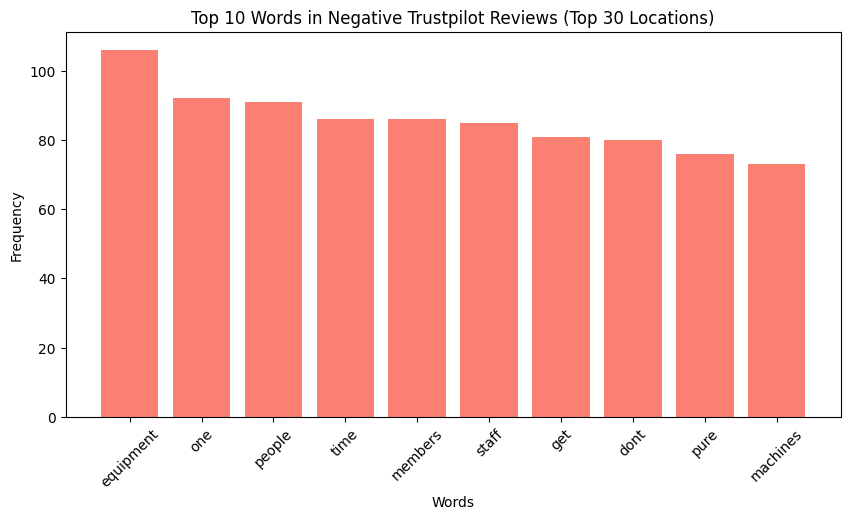

In [ ]:
# Trustpilot Negative Reviews - Top 30 Locations

# Flatten all tokens into a single list
tp_top30_tokens = [word for tokens in df_tp_top30['Tokens'] for word in tokens]

# Create frequency distribution
fdist_tp_top30 = FreqDist(tp_top30_tokens)

# Top 10 words DataFrame
fdist_tp_top30_df = pd.DataFrame(fdist_tp_top30.most_common(10), columns=['Word', 'Frequency'])

# Plot Trustpilot top 10 words
plt.figure(figsize=(10,5))
plt.bar(fdist_tp_top30_df['Word'], fdist_tp_top30_df['Frequency'], color='salmon')
plt.title('Top 10 Words in Negative Trustpilot Reviews (Top 30 Locations)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

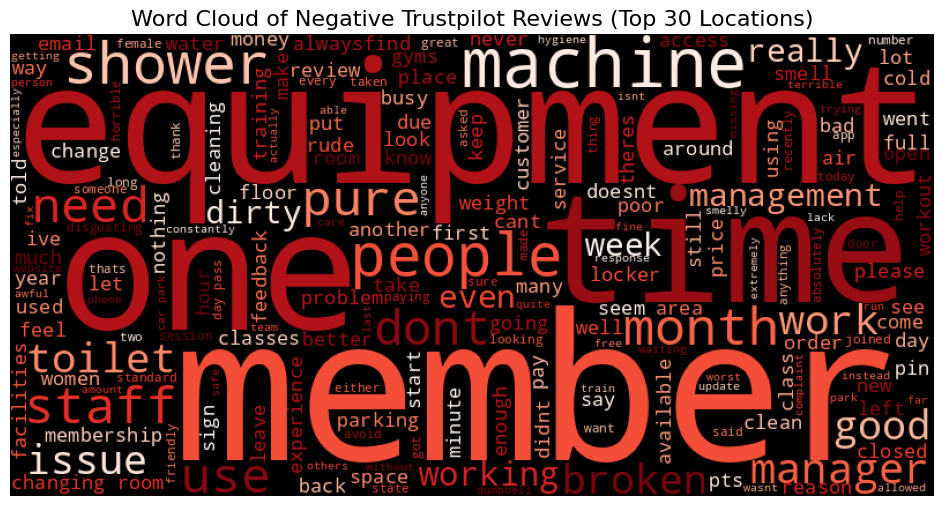

In [ ]:
# Word cloud for Trustpilot
wc_tp_top30 = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(" ".join(df_tp_top30['Review Content'].dropna()))

plt.figure(figsize=(12,6))
plt.imshow(wc_tp_top30)
plt.axis('off')
plt.title('Word Cloud of Negative Trustpilot Reviews (Top 30 Locations)', fontsize=16)
plt.show()

## 📝 Commentary on Word Distribution & Word Clouds (Google vs. Trustpilot, Negative Reviews)

## Trustpilot — Word Distribution (All vs. Top 30 Locations)
 - **Similarities:**
  - “Equipment” consistently appears at the top across both sets.  
- **Differences:**
  - “Membership” is prominent in all reviews but disappears in the top 30 set.  
  - “People” and “Time” rise significantly in the top 30 set, despite being low or absent in the full dataset.  

## Trustpilot — Word Cloud (All vs. Top 30 Locations)
- **Similarities:**
  - “Equipment,” “Time,” and “One” appear strongly in both sets.  
- **Differences:**
  - “Member” becomes the largest word in the top 30, whereas “Machine” is visually reduced.  

## Google — Word Distribution (All vs. Top 30 Locations)
- **Similarities:**
  - “Equipment,” “Staff,” “People,” and “Machine” remain the dominant four terms.  
- **Differences:**
  - Minimal — differences in less meaningful words don’t shift the overall picture.  

## Google — Word Cloud (All vs. Top 30 Locations)
- **Similarities:**
  - “Equipment,” “Staff,” and “Machine” consistently stand out.  
- **Differences:**
  - In the top 30 set, “Equipment,” “Staff,” and “Machine” are noticeably larger, occupying more visual weight.  

---

## Conclusion
Trustpilot’s review data shows sharper contrasts when comparing all reviews to the top 30 locations — shifts around “membership,” “people,” and “time” suggest that location-specific complaints differ from general dissatisfaction.  

Google’s data, by contrast, remains more stable, with “equipment,” “staff,” and “machine” dominating regardless of scope. This suggests Google reviews highlight more consistent pain points across locations, while Trustpilot highlights more contextual, location-driven concerns.  

In [ ]:
# Create list of reviews (each review is a document)
merged_reviews_list = df_google_top30['Comment'].dropna().tolist() + \
                      df_tp_top30['Review Content'].dropna().tolist()

# Initialize BERTopic
# hdb = hdbscan.HDBSCAN()
# topic_model_top30 = BERTopic( hdbscan_model=hdb)
topic_model_top30 = BERTopic()

# Fit the model and transform the documents
topics_top30, probs_top30 = topic_model_top30.fit_transform(merged_reviews_list)

# Get topic information
topic_info_top30 = topic_model_top30.get_topic_info()
topic_info_top30.head(10)  # Show top 10 topics

Topic  Count                               Name  \
0      0    879  0_equipment_staff_people_machines   
1      1     39            1_parking_car_free_park   

                                      Representation  \
0  [equipment, staff, people, machines, one, dont...   
1  [parking, car, free, park, fines, reg, fine, w...   

                                 Representative_Docs  
0  [excited opening minute walk house quickly hom...  
1  [several others mentioned members never told r...

In [ ]:
topic_model_top30.visualize_barchart()

## 📝 Commentary on BERTopic Models (All Reviews vs. Top 30 Locations, Google & Trustpilot Combined)

## Topic Structure Changes
- **First Run (All Reviews):** 10 distinct topics identified, showing granular thematic separation.  
- **Top 30 Run:** Only 2 topics identified, indicating significant consolidation of complaints.  

---

## Topic Content Analysis

### Dominant Topic (Topic 0)
- Consistent focus on **“equipment,” “staff,” “people,” and “machines”** as primary concerns.  
- Represents **879 out of 918 reviews (95.8%)** → overwhelming dominance.  
- Suggests core operational issues are **universal across top-performing locations**.  

### Secondary Topic (Topic 1)
- Highly specific: **“parking,” “car,” “free,” “park,” “fines.”**  
- Only **39 reviews (4.2%)** → a niche but persistent complaint.  
- Parking-related issues emerge as the **only secondary concern worth distinguishing**.  

---

## Key Differences from First Run
- **Topic Consolidation:** Model collapsed from 10 topics to 2 → complaints more homogeneous in top 30.  
- **Loss of Granularity:** Themes like toilets/cleanliness, classes/booking, air conditioning, cancellations, and customer service are absorbed into the main topic.  
- **Parking Prominence:** Parking, previously buried in the full dataset, now emerges as the **only distinct secondary theme**.  

---

## Additional Insights
- **Operational Focus:** Top 30 gyms still show **equipment and staffing** as the main dissatisfaction drivers.  
- **Location-Specific Challenges:** Parking complaints suggest **infrastructure issues** that even strong-performing locations face.  
- **Simplified Pain Points:** Fewer complaint categories overall, but **core operational problems remain unchanged**.  

---

## Conclusion
The Top 30 locations model shows that high-performing gyms haven’t solved the **fundamental operational challenges** (equipment and staffing). However, they have eliminated many **secondary complaint categories**.  

**Parking** stands out as the only infrastructure-related issue distinct enough to become its own topic, highlighting that even well-managed locations cannot fully avoid certain external challenges.  

# Conducting Emotion Analysis

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
# Load the Hugging Face model into a pipeline
emotion_classifier = pipeline(
    "text-classification",
    model="bhadresh-savani/bert-base-uncased-emotion",
    return_all_scores=True
)

config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Quick test
test_text = "I am going insane, there is someone in my heard trying to take over this is not a joke you have to help m-"
emotion_classifier(test_text)

[[{'label': 'sadness', 'score': 0.0022252174094319344},
  {'label': 'joy', 'score': 0.006353461183607578},
  {'label': 'love', 'score': 0.0006314960191957653},
  {'label': 'anger', 'score': 0.09028397500514984},
  {'label': 'fear', 'score': 0.890379011631012},
  {'label': 'surprise', 'score': 0.010126900859177113}]]

In [ ]:
# Function to get the top emotion
def get_top_emotion(text):
    if not isinstance(text, str) or not text.strip():
        return "unknown"
    # Run the emotion classifier
    results = emotion_classifier(text)
    # results is a list of dicts with 'label' and 'score'
    top_emotion = max(results[0], key=lambda x: x['score'])['label']
    return top_emotion

# Apply to Google negative reviews
df_google_negative['Predicted_Emotion'] = df_google_negative['Comment'].apply(get_top_emotion)

# Apply to Trustpilot negative reviews
df_tp_negative['Predicted_Emotion'] = df_tp_negative['Review Content'].apply(get_top_emotion)

In [ ]:
# Quick check
df_google_negative[['Comment', 'Predicted_Emotion']].head()


Comment Predicted_Emotion
1   many students two local colleges leave rubbish...             anger
4   current member quite dirty often theres soap b...           sadness
7   way hot even workout windows open barely works...             anger
19  access empty assistance gain access fault forg...           sadness
29  year finally leaving gutted staff pts lovely c...              love

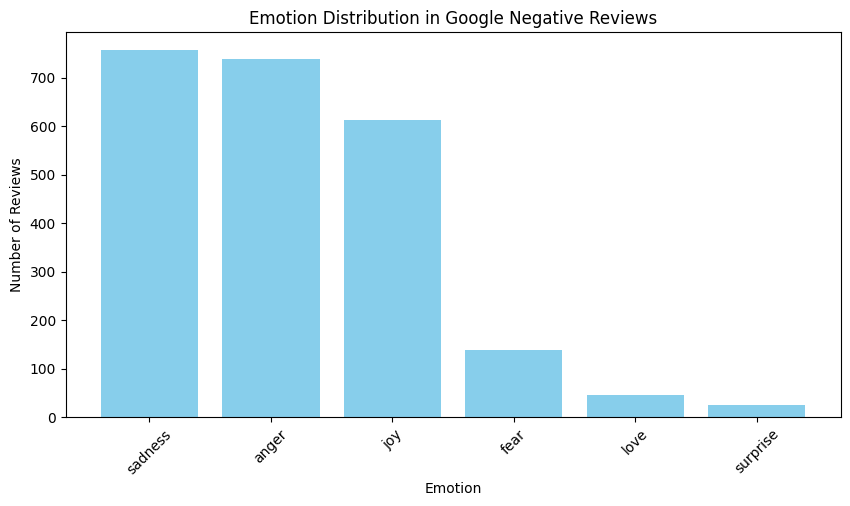

In [ ]:
# Count emotions in each dataset
google_emotion_counts = df_google_negative['Predicted_Emotion'].value_counts()
tp_emotion_counts = df_tp_negative['Predicted_Emotion'].value_counts()

# Plot Google negative reviews
plt.figure(figsize=(10,5))
plt.bar(google_emotion_counts.index, google_emotion_counts.values, color='skyblue')
plt.title("Emotion Distribution in Google Negative Reviews")
plt.xlabel("Emotion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

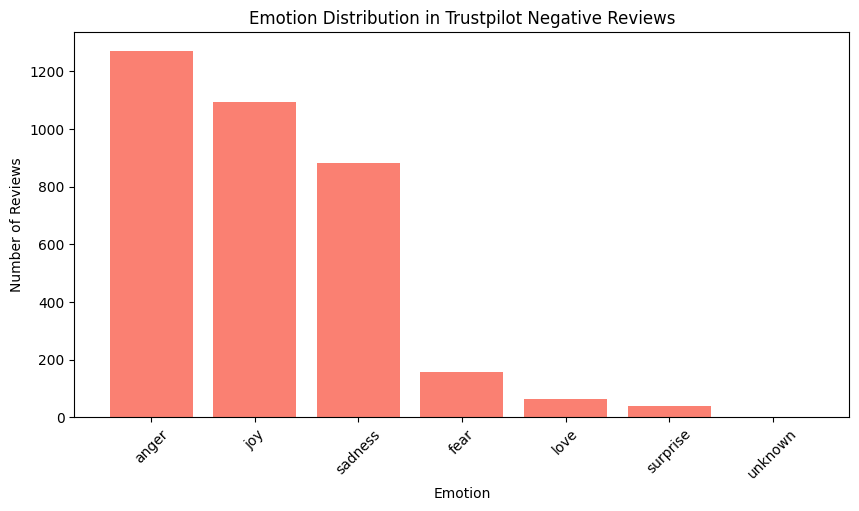

In [ ]:
# Plot Trustpilot negative reviews
plt.figure(figsize=(10,5))
plt.bar(tp_emotion_counts.index, tp_emotion_counts.values, color='salmon')
plt.title("Emotion Distribution in Trustpilot Negative Reviews")
plt.xlabel("Emotion")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Google and Trustpilot negative reviews where anger is top emotion
google_anger_reviews = df_google_negative[df_google_negative['Predicted_Emotion'] == 'anger']
tp_anger_reviews = df_tp_negative[df_tp_negative['Predicted_Emotion'] == 'anger']

In [ ]:
print("Google anger reviews:", len(google_anger_reviews))
print("Trustpilot anger reviews:", len(tp_anger_reviews))

Google anger reviews: 738
Trustpilot anger reviews: 1272


In [ ]:
# Combine Google and Trustpilot anger reviews into one list
merged_anger_reviews = list(google_anger_reviews['Comment'].dropna()) + \
                       list(tp_anger_reviews['Review Content'].dropna())

# Initialize BERTopic
topic_model_anger = BERTopic()

# Fit the model and get topics
topics_anger, probs_anger = topic_model_anger.fit_transform(merged_anger_reviews)

# Topic summary info
topic_info_anger = topic_model_anger.get_topic_info()
topic_info_anger.head(10)  # show top 10 topics

Topic  Count                                    Name  \
0     -1    717         -1_people_staff_membership_time   
1      0    237  0_changing_cleaning_toilets_disgusting   
2      1    140      1_weights_equipment_machines_bench   
3      2     87                  2_pass_day_code_bought   
4      3     81       3_membership_cancel_account_month   
5      4     60             4_joining_fee_discount_code   
6      5     51      5_classes_class_booked_instructors   
7      6     47          6_cold_showers_shower_freezing   
8      7     46                 7_parking_car_fine_park   
9      8     43               8_music_loud_classes_hear   

                                      Representation  \
0  [people, staff, membership, time, dont, one, e...   
1  [changing, cleaning, toilets, disgusting, room...   
2  [weights, equipment, machines, bench, gyms, ma...   
3  [pass, day, code, bought, pin, get, paid, emai...   
4  [membership, cancel, account, month, contact, ...   
5  [joining, fee, discount, code, charged, month,...   
6  [classes, class, booked, instructors, book, ca...   
7  [cold, showers, shower, freezing, water, tempe...   
8  [parking, car, fine, park, carpark, fined, app...   
9  [music, loud, classes, hear, play, headphones,...   

                                 Representative_Docs  
0  [looks nice actually good place work weeks ago...  
1  [use every weekend dread female toilets total ...  
2  [worst ive ever barely equipment many machines...  
3  [paid day pass pin wouldnt let get, day pass p...  
4  [want cancel membership hard find cancel membe...  
5  [given offer joining fee charged joining, char...  
6  [inconsistent classes instructors arent good t...  
7         [cold showers, showers cold, showers cold]  
8  [lie parking say free onsite parking parking c...  
9  [music please change music, really noisy consi...

In [ ]:
# Visualize clusters in 2D space
topic_model_anger.visualize_topics()

In [ ]:
# Visualize top words for each topic
topic_model_anger.visualize_barchart(top_n_topics=10)

In [ ]:
topic_model_anger.visualize_heatmap()

## 📝 Commentary on BERTopic Models (Anger-Only Reviews vs. All Negative Reviews, Google & Trustpilot Combined)

## Topic Structure Changes
- **Anger-Only Model:** 10 topics identified with more distinct thematic separation.  
- **All Negative Model:** 10 topics maintained, showing consistent structural complexity.  
- Both models preserve **granular topic differentiation**, unlike the Top 30 locations model.  

---

## Key Topic Differences (Anger vs. All Negative)

### Topic 0 Transformation
- **Anger:** *“changing,” “cleaning,” “toilets,” “disgusting,” “rooms”* → strong focus on **facility hygiene**.  
- **All Negative:** *“fee,” “joining,” “code,” “discount,” “charged”* → focus on **pricing and membership issues**.  
- **Insight:** Anger stems from **immediate environmental failures**, while broader negatives are driven by **financial concerns**.  

### Equipment Issues (Topic 1 vs. Topic 8)
- **Anger (Topic 1):** *“weights,” “equipment,” “machines,” “bench,” “gyms”* → emphasis on **availability**.  
- **All Negative (Topic 8):** *“machines,” “broken,” “enough”* → emphasis on **functionality**.  
- **Insight:** Equipment complaints are universal but anger highlights **access**, while negatives highlight **maintenance**.  

### New Anger-Specific Topics
- **Topic 6:** *“cold,” “showers,” “shower,” “freezing,” “water”* → **temperature discomfort**.  
- **Topic 8:** *“music,” “loud,” “classes,” “hear,” “play”* → **noise/atmosphere complaints**.  
- **Topic 9:** *“closed,” “open,” “opening,” “christmas,” “time”* → **accessibility frustrations**.  

---

## Primary Anger Triggers Identified
- **Hygiene & Cleanliness:** *“disgusting,” “toilets,” “cleaning”* dominate → immediate visceral reaction.  
- **Physical Discomfort:** Cold showers and freezing gyms → strong emotional responses.  
- **Sensory Overload:** Loud music and disruptive noise → environmental disruption.  
- **Access Denial:** Unexpected closures → frustration when **service is blocked**.  
- **Equipment Availability:** Shift from **broken machines** to **not enough weights/machines**.  

---

## Comparison Insights
- **Emotional Specificity:** Anger reviews = *immediate, sensory-driven* (cold, loud, disgusting). Negative reviews = *systemic issues* (pricing, booking, service).  
- **Environmental Focus:** Angry customers prioritize **physical environment quality** over admin/procedural concerns.  
- **Immediacy Factor:** Anger topics reflect **real-time disruptions** (cold showers, noise, closures), vs. longer-term relationship issues.  

---

## Conclusion
The **anger-only model** reveals that furious gym customers are reacting primarily to **immediate environmental failures**: unsanitary facilities, cold temperatures, excessive noise, and sudden closures.  

By contrast, **general negative reviews** span broader operational and commercial issues such as pricing and membership.  

👉 Preventing angry reviews requires prioritizing **real-time facility management** (cleanliness, comfort, noise control, access) rather than focusing only on systemic operational fixes.  

# Saves

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Define base project folder path
project_path = "/content/drive/MyDrive/CAM_DS/CAM_DS_projects/PureGym_project/"

# Topics assigned to each review
df_results = pd.DataFrame({
    "Review": merged_reviews,
    "Topic": topics,
    "Probability": probs
})
df_results.to_csv(project_path + "bert_results.csv", index=False)

# Topic summary info
topic_info = topic_model.get_topic_info()
topic_info.to_csv(project_path + "bert_topic_info.csv", index=False)

# Save Google and Trustpilot negative reviews
df_google_negative.to_csv(project_path + "google_negative_reviews.csv", index=False)
df_tp_negative.to_csv(project_path + "trustpilot_negative_reviews.csv", index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Using a large language model from Hugging Face (new notebook)







In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 16.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers==4.49.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 151.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 127.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.0
    Uninstalling tokenizers-0.22.0:
      Successfully uninstalled tokenizers-0.22.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


In [ ]:
import json

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

In [ ]:
torch.random.manual_seed(0)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define path to project folder
project_path = "/content/drive/MyDrive/CAM_DS/CAM_DS_projects/PureGym_project/"

# Read the saved files
df_google_negative = pd.read_csv(project_path + "google_negative_reviews.csv")
df_tp_negative = pd.read_csv(project_path + "trustpilot_negative_reviews.csv")
df_results = pd.read_csv(project_path + "bert_results.csv")
topic_info = pd.read_csv(project_path + "bert_topic_info.csv")

Mounted at /content/drive


In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-4-mini-instruct",
    device_map="auto",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-4-mini-instruct")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

configuration_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-4-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.77G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

In [ ]:
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    )

Device set to use cuda:0


In [ ]:
generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "do_sample": False,
}

In [ ]:
messages_1 = [
    {"role": "system", "content": "You work as a data analyst insights guru for a large gym company and you want to find topics for improvments from customer reviews. You should return these in an array of strings only ['topic 1', 'topic 2', 'topic 3', ...]"},
    {"role": "user", "content": "In the following customer review interaction pick out a maximum of 3 main topics and return them as an array of topics: The showers are disgusting"},
    {"role": "assistant", "content": "['Shower cleanliness', 'odour', 'customer discomfort']"},
    {"role": "user", "content": "In the following customer review interaction pick out the main 3 topics and return them as an array of topics: I have paid my membership but I can't access the gym, I am still waiting on a code"},
]

In [ ]:
output = pipe(messages_1, **generation_args)

In [ ]:
topic_list_string = output[0]['generated_text'].replace("'", '"')
print(topic_list_string)

["Membership access", "Technical issues", "Delayed service"]


### Introduce google and tp reviews

Message 2: Top 3 topics

In [ ]:
seed = 42

# Sample reviews
sample_google = df_google_negative.sample(n=150, random_state=seed)
sample_tp = df_tp_negative.sample(n=350, random_state=seed)

# Convert to lists and drop NaNs
sample_google_list = sample_google['Comment'].dropna().tolist()
sample_tp_list = sample_tp['Review Content'].dropna().tolist()

# Merge into one list
merged_samples = sample_google_list + sample_tp_list

In [ ]:
len(merged_samples)

500

In [ ]:
import json
import ast
import re

In [ ]:
topics_llm = []
print(len(merged_samples))
iter = 0
for i, review in enumerate(merged_samples[0:500], start=1):
  if len(str(review)) < 1000:
    messages_2 = [
      {"role": "system", "content": "You work as a data analyst insights guru for a  top gym in the UK and you want to find topics for improvments from customer reviews. You should return these in an array of strings only ['topic 1', 'topic 2', 'topic 3', ...]"},
      {"role": "user", "content": "In the following customer review interaction pick out a maximum of 3 main topics and return them as an array of topics: Food was cold and we waited for ages"},
      {"role": "assistant", "content": "['Cold and unsatisfactory meal', 'Slow service']"},
      {"role": "user", "content": f"In the following customer review interaction pick out the main 3 topics and return them as an array of topics: {review}"},
    ]
    output = pipe(messages_2, **generation_args)

    #print(sequences[0]['generated_text'])
    topic_list_string = output[0]['generated_text'].replace("'", '"')

    # --- Fail-safe parsing ---
    try:
        topic_list = json.loads(topic_list_string)
        # Ensure li st of strings
        if not isinstance(topic_list, list):
            topic_list = [str(topic_list)]
        topic_list = [str(t).strip() for t in topic_list]
        topics_llm.append(topic_list)
    except Exception:
        # Skip this review if parsing fails
        print(f"Skipping review {i} due to parsing error.")
        continue

    topic_list = json.loads(topic_list_string)

    # --- Progress print ---
    if i % 10 == 0 or i == len(merged_samples[0:500]):
        print(f"Processed {i} reviews so far")

    topics_llm.append(topic_list)



500
Skipping review 8 due to parsing error.


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processed 10 reviews so far
Processed 20 reviews so far
Processed 30 reviews so far
Processed 40 reviews so far
Processed 50 reviews so far
Processed 60 reviews so far
Processed 70 reviews so far
Processed 80 reviews so far
Processed 90 reviews so far
Processed 100 reviews so far
Processed 110 reviews so far
Skipping review 115 due to parsing error.
Processed 120 reviews so far
Processed 130 reviews so far
Processed 140 reviews so far
Processed 150 reviews so far
Processed 160 reviews so far
Processed 170 reviews so far
Processed 180 reviews so far
Processed 190 reviews so far
Skipping review 204 due to parsing error.
Processed 210 reviews so far
Processed 220 reviews so far
Processed 230 reviews so far
Processed 240 reviews so far
Processed 250 reviews so far
Processed 260 reviews so far
Processed 270 reviews so far
Processed 280 reviews so far
Processed 290 reviews so far
Processed 300 reviews so far
Processed 310 reviews so far
Processed 320 reviews so far
Processed 330 reviews so f

In [ ]:
topic_string_array = [item for row in topics_llm for item in row if item.strip()]

In [ ]:
from bertopic import BERTopic

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [ ]:
bert_model = BERTopic()

topics, probs = bert_model.fit_transform(topic_string_array)
topics_info = bert_model.get_topic_info()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topics_info.head()

Topic  Count                                      Name  \
0     -1    182       -1_layout_cold_induction_complaints   
1      0     64  0_availability_equipment_limited_sharing   
2      1     56         1_staff_behavior_theft_belongings   
3      2     56              2_value_upgrade_price_prices   
4      3     54         3_shower_accessibility_wipe_towel   

                                      Representation  \
0  [layout, cold, induction, complaints, insuffic...   
1  [availability, equipment, limited, sharing, co...   
2  [staff, behavior, theft, belongings, staffing,...   
3  [value, upgrade, price, prices, money, pricing...   
4  [shower, accessibility, wipe, towel, showers, ...   

                                 Representative_Docs  
0         [Cold showers, Cold showers, Cold showers]  
1  [Equipment availability, Equipment availabilit...  
2   [Staff behavior, Staff behavior, Staff behavior]  
3  [Value for money, High prices and poor value, ...  
4  [Shower facilities, Shower service, Shower ser...

In [ ]:
bert_model.visualize_topics()

In [ ]:
bert_model.visualize_barchart()

## 📝 Commentary on BERTopic Model (Pain Points Extracted via Phi-4-Mini-Instruct)

## Topic Structure Changes
- **Pain Points Model:** 8 topics identified with highly focused, specific themes.  
- **Previous Models:** 10 topics with broader, overlapping categories.  
- **Improvement:** Significant boost in topic clarity and semantic coherence.  

---

## Enhanced Topic Quality
- **Topic Specificity:** Each topic is now a distinct, actionable pain point (vs. mixed complaint categories before).  
- **Semantic Coherence:** Words within each topic are more tightly related and contextually meaningful.  
- **Reduced Noise:** Generic terms (*“gym,” “time,” “people”*) eliminated — they no longer blur multiple topics.  

---

## New Insights from Pain Point Analysis

### Topic 0 — Equipment Scarcity  
*“availability,” “equipment,” “limited,” “sharing,” “condition”* → resource constraints vs. breakdowns.  

### Topic 1 — Staff Misconduct  
*“staff,” “behavior,” “theft,” “belongings,” “staffing”* → behavioral/security issues beyond service complaints.  

### Topic 2 — Value Proposition  
*“value,” “upgrade,” “price,” “prices,” “money”* → separates pricing from membership admin issues.  

### Topic 3 — Facility Amenities  
*“shower,” “accessibility,” “wipe,” “towel,” “showers”* → complaints about specific features.  

### Topic 4 — Environmental Quality  
*“cleanliness,” “plastics,” “store,” “ambiance,” “fresh”* → atmosphere and aesthetics.  

### Topic 5 — Health & Safety  
*“safety,” “concerns,” “health,” “unhygienic,” “neglect”* → serious welfare issues.  

### Topic 6 — Facility Adequacy  
*“facilities,” “inadequate,” “customers,” “male,” “neglected”* → capacity and demographic-specific issues.  

### Topic 7 — Maintenance Standards  
*“hygiene,” “cleaning,” “cleanliness,” “frequency,” “clothes”* → operational maintenance failures.  

---

## Improvements Over Previous Models
- **Actionable Categories:** Topics map directly to operational areas.  
- **Severity Differentiation:** Clear split between minor inconveniences (towels/wipes) vs. serious issues (theft/safety).  
- **Operational Mapping:** Each aligns with business functions (staffing, pricing, maintenance, facilities).  
- **Reduced Redundancy:** Overlapping themes eliminated → cleaner, sharper insights.  

---

## Strategic Insights
- **Critical Issues:** Staff theft & safety concerns (Topics 1 & 5) = severe reputation risks.  
- **Capacity Problems:** Equipment scarcity & facility inadequacy = under-investment signs.  
- **Maintenance Gaps:** Hygiene/cleanliness failures (Topics 4 & 7) are persistent weaknesses.  
- **Value Perception:** Pricing concerns form their own topic, highlighting cost-benefit as a distinct pain point.  

---

## Conclusion
The **Phi-4-Mini-Instruct pain point extraction** significantly improved BERTopic’s output, delivering **8 distinct, actionable complaint categories**.  

It eliminated noise, ensured semantic coherence, and surfaced **serious hidden issues** (e.g., staff theft, safety risks) while separating **maintenance failures** from **capacity constraints**.  

👉 This method provides the **clearest roadmap yet** for prioritizing operational improvements across different domains.  

Message 3: Insights

In [ ]:
# Define project path
project_path = "/content/drive/MyDrive/CAM_DS/CAM_DS_projects/PureGym_project/"

# Save topic_string_array
topic_string_array_df = pd.DataFrame({'topic_string_array': topic_string_array})
topic_string_array_df.to_csv(os.path.join(project_path, "topic_string_array.csv"), index=False)

# Save merged_samples
merged_samples_df = pd.DataFrame({'merged_samples': merged_samples})
merged_samples_df.to_csv(os.path.join(project_path, "merged_samples.csv"), index=False)

# Save topics_llm (flatten each inner list to a string with '|')
topics_llm_str = ["|".join(topics) for topics in topics_llm]
topics_llm_df = pd.DataFrame({'topics_llm': topics_llm_str})
topics_llm_df.to_csv(os.path.join(project_path, "topics_info.csv"), index=False)

In [ ]:
import torch, gc
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("[INFO] Cleared CUDA memory \n")


[INFO] Cleared CUDA memory 



In [ ]:
messages_3 = [
    {"role": "system", "content": "You work as a data analyst insights guru for a top gym in the UK and you want to compress a given list into collated topics. You should return these in a list as business insights that can be used to improve the business"},
    {"role": "user", "content": "In the following list containing the main extracted topics from customer reviews, group or compress the topics and return them with actionable insights in a numbered list: ['Poor service experience','Comparison of food and service','Overall satisfaction','Service improvement needed','Food quality','Cleanliness of establishment','Neutral dining experience','Potential health and safety concerns','Overall satisfaction',]"},
    {"role": "assistant", "content": "1. Service: Introduce training for staff to ensure that service is improved across the company. \n 2. Food quality: Review the menu and introduce rigorous food preparation process to enforce high standards. \n ..."},
    {"role": "user", "content": f"In the following list containing the main extracted topics from customer reviews, group or compress the topics and return them with actionable insights in a numbered list: {topic_string_array}"},
]

In [ ]:
output = pipe(messages_3, **generation_args)
insights = output[0]['generated_text']

In [ ]:
print(insights)

1. **Service Quality and Staff Behavior**: 
   - Train staff to improve professionalism and customer service.
   - Address unprofessional behavior and ensure staff responsiveness.
   - Implement conflict management and staff training programs.

2. **Facility Maintenance and Cleanliness**: 
   - Increase cleaning frequency and improve maintenance of facilities.
   - Address hygiene and cleanliness issues, including locker and changing room maintenance.
   - Ensure proper ventilation and air conditioning to maintain a comfortable environment.

3. **Equipment Quality and Maintenance**: 
   - Regularly maintain and repair equipment to prevent malfunctions and ensure safety.
   - Address equipment wear and tear and ensure availability of a variety of equipment.
   - Improve the quality of equipment and ensure proper use and maintenance.

4. **Membership and Pricing**: 
   - Review membership options and pricing to ensure value for money.
   - Consider offering a free buddy program and direc

1. **Service Quality and Staff Behavior**:
   - Train staff to improve professionalism and customer service.
   - Address unprofessional behavior and ensure staff responsiveness.
   - Implement conflict management and staff training programs.

2. **Facility Maintenance and Cleanliness**:
   - Increase cleaning frequency and improve maintenance of facilities.
   - Address hygiene and cleanliness issues, including locker and changing room maintenance.
   - Ensure proper ventilation and air conditioning to maintain a comfortable environment.

3. **Equipment Quality and Maintenance**:
   - Regularly maintain and repair equipment to prevent malfunctions and ensure safety.
   - Address equipment wear and tear and ensure availability of a variety of equipment.
   - Improve the quality of equipment and ensure proper use and maintenance.

4. **Membership and Pricing**:
   - Review membership options and pricing to ensure value for money.
   - Consider offering a free buddy program and direct debit payment method.
   - Address issues related to membership cancellation and upgrade processes.

5. **Customer Experience and Communication**:
   - Improve communication and response times from customer service.
   - Address billing and payment issues, including unexpected charges and double charges.
   - Enhance the onboarding process and provide clear information on membership terms and conditions.

6. **Facility Management and Safety**:
   - Address overcrowding and ensure sufficient space and equipment availability.
   - Implement better management of facilities and equipment, including locker and changing room maintenance.
   - Address safety concerns, including security measures and staff response to violent individuals.

7. **Customer Satisfaction and Feedback**:
   - Collect and address specific feedback from customers to improve their experience.
   - Address issues related to customer satisfaction, including poor service quality and negative experiences.
   - Implement a more effective feedback system to gather and act on customer input.

8. **Health and Safety Concerns**:
   - Address health and safety concerns, including poor air quality and unhygienic conditions.
   - Ensure proper supervision and safety measures are in place, especially for children and vulnerable individuals.
   - Address issues related to substance abuse and provide support for mental health.

9. **Facility Cleanliness and Maintenance**:
   - Improve cleanliness and maintenance of facilities, including showers, restrooms, and changing rooms.
   - Address issues related to poor maintenance and cleanliness, such as mold and unclean facilities.

10. **Customer Service and Management**:
    - Improve customer service and management, including staff training and responsiveness.


In [ ]:
import os
import pandas as pd

# Define project path
project_path = "/content/drive/MyDrive/CAM_DS/CAM_DS_projects/PureGym_project/"

# Save topic_string_array
topic_string_array_df = pd.DataFrame({'topic_string_array': topic_string_array})
topic_string_array_df.to_csv(os.path.join(project_path, "topic_string_array.csv"), index=False)

# Save merged_samples
merged_samples_df = pd.DataFrame({'merged_samples': merged_samples})
merged_samples_df.to_csv(os.path.join(project_path, "merged_samples.csv"), index=False)

# Save topics_llm (flatten each inner list to a string with '|')
topics_llm_str = ["|".join(topics) for topics in topics_llm]
topics_llm_df = pd.DataFrame({'topics_llm': topics_llm_str})
topics_llm_df.to_csv(os.path.join(project_path, "topics_info.csv"), index=False)

# Save insights (single string)
insights_df = pd.DataFrame({'insights': [insights]})
insights_df.to_csv(os.path.join(project_path, "insights.csv"), index=False)

print("All outputs saved as CSVs in Google Drive.")

All outputs saved as CSVs in Google Drive.


# Using Gensim (new notebook)




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
import json
import random
from datetime import datetime

from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

from datasets import Dataset

from tqdm import tqdm

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define path to project folder
project_path = "/content/drive/MyDrive/CAM_DS/CAM_DS_projects/PureGym_project/"

# Read the saved files
df_google_negative = pd.read_csv(project_path + "google_negative_reviews.csv")
df_tp_negative = pd.read_csv(project_path + "trustpilot_negative_reviews.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gensim nltk datasets pyLDAvis ipykernel

In [ ]:
import ast

# Convert string representation of list to actual list
df_google_negative['Tokens'] = df_google_negative['Tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_tp_negative['Tokens'] = df_tp_negative['Tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
# Flatten all tokens from both datasets into a single list
combined_token_lists = df_google_negative['Tokens'].tolist() + df_tp_negative['Tokens'].tolist()

In [ ]:
# Create a dictionary representation of the documents.
from gensim import corpora
dictionary = corpora.Dictionary(combined_token_lists)

# Filter out words that occur fewer than 2 documents or more than 50% of the documents.
dictionary.filter_extremes(no_below=2, no_above=0.5)

In [ ]:
# Create a BOW representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in combined_token_lists]

# Set parameters.
num_topics = 10
passes = 20

In [ ]:
# Create the LDA model.
from gensim.models.ldamodel import LdaModel
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes)

In [ ]:
# Print the topics.
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))

Topic: 0 
Words: 0.030*"membership" + 0.016*"month" + 0.015*"pay" + 0.014*"fee" + 0.013*"joining" + 0.011*"account" + 0.011*"gyms" + 0.010*"price" + 0.009*"cancel" + 0.008*"access"
Topic: 1 
Words: 0.011*"temperature" + 0.008*"like" + 0.008*"log" + 0.007*"door" + 0.006*"doors" + 0.006*"way" + 0.006*"bit" + 0.006*"daughter" + 0.006*"need" + 0.005*"answer"
Topic: 2 
Words: 0.017*"staff" + 0.013*"members" + 0.009*"dont" + 0.008*"health" + 0.008*"member" + 0.008*"management" + 0.007*"disabled" + 0.007*"safety" + 0.007*"issue" + 0.006*"experience"
Topic: 3 
Words: 0.017*"equipment" + 0.014*"staff" + 0.014*"people" + 0.011*"one" + 0.010*"like" + 0.009*"dont" + 0.009*"machines" + 0.008*"time" + 0.007*"use" + 0.007*"get"
Topic: 4 
Words: 0.030*"water" + 0.026*"showers" + 0.015*"broken" + 0.014*"changing" + 0.013*"months" + 0.013*"shower" + 0.013*"cold" + 0.012*"weeks" + 0.010*"order" + 0.009*"hot"
Topic: 5 
Words: 0.025*"get" + 0.023*"day" + 0.020*"email" + 0.016*"pass" + 0.016*"pin" + 0.015*"

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualisation.
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


## 📝 Commentary on LDA Model Output (Gensim, 10 Topics)

## Topic Structure & Distribution
- **LDA Model:** 10 topics with varying sizes → clear hierarchical importance.  
- **Topic Dominance:** Topic 1 significantly larger than others → major complaint category.  
- **Topic Spacing:** Intertopic distance map shows well-separated clusters with minimal overlap.  
- **Marginal Distribution:** Relatively even (2–10% range) → balanced thematic coverage.  

---

## Comparison with BERTopic Models
- **Topic Count Consistency:** LDA’s 10 topics align with BERTopic runs (except Top 30 model).  
- **Term Prominence:** *“equipment,” “staff,” “machines,” “membership”* dominate in both.  
- **Semantic Coherence:** LDA shows cleaner separation, less overlap.  
- **Topic Quality:** More interpretable clusters, reduced noise terms.  

---

## Key Salient Terms Analysis
- **Equipment Dominance:** *“equipment”* salience ~1400 → primary concern.  
- **Staff Issues:** *“staff”* salience ~1200 → consistent with earlier findings.  
- **Infrastructure Terms:** *“machines,” “air,” “water,” “showers”* → facility concerns.  
- **Operational Terms:** *“classes,” “membership,” “day,” “working,” “changing”* → service delivery issues.  

---

## LDA-Specific Insights
- **Topic Isolation:** Topics 10, 8, 9 appear as distinct outliers → unique complaints.  
- **Core Cluster:** Topics 2, 3, 5 form tight cluster → related operational issues.  
- **Central Topic:** Topic 1 central & largest → most common complaint pattern.  
- **Balanced Coverage:** More proportional topic sizes vs. BERTopic dominance.  

---

## Additional Insights Obtained
- **Clearer Thematic Separation:** Better separation of overlapping complaint themes.  
- **Term Importance Ranking:** Salience scores give stronger prioritization than BERTopic word scores.  
- **Topic Relationships:** Distance mapping reveals related vs. independent issues.  
- **Noise Reduction:** Fewer generic terms (*“time,” “people,” “gym”*) than BERTopic.  

---

## Methodological Advantages
- **Interpretability:** Clearer business insights for prioritization.  
- **Statistical Foundation:** Probabilistic approach provides robust assignments.  
- **Scalability:** Handles vocabulary size & coherence effectively.  
- **Complementary Analysis:** Confirms BERTopic findings, adds new perspectives.  

---

## Conclusion
The **LDA model** validates BERTopic’s main findings while offering **cleaner thematic separation** and stronger interpretability.  

- **Equipment, staff, and facility concerns** remain the core complaint categories.  
- **Salience ranking** establishes equipment as the dominant issue.  
- **Distance mapping** clarifies which problems cluster together vs. stand alone.  

👉 Together, BERTopic and LDA provide a **dual-method perspective**: reinforcing confidence in the core pain points while improving clarity on their relationships and relative importance.  